# DIY Covid-19 Dashboard

### This is a DIY Covid dashboard that shows the number of Covid cases and occupied beds in the hospital.

In [46]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [47]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [48]:
# Loading data from json file in which I saved it.
with open("beds.json","rt") as INFILE:
    data = json.load(INFILE)
jsondata = data['data']


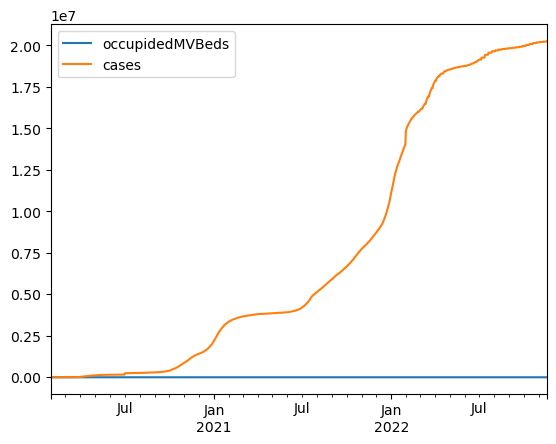

In [49]:
# Here I'm going to define the DataFrame.
# I use date as X, other data as Y.

dates = [dictionary['date']for dictionary in jsondata]
dates.sort()

def parse_date(datestring):
    return pd.to_datetime(datestring,format="%Y-%m-%d")
startDate = parse_date(dates[0])
endDate = parse_date(dates[-1])

x = pd.date_range(startDate, endDate, freq='D')
y = pd.DataFrame(index=x, columns=['occupidedMVBeds','cases'])

# Filling in the DataFrame, which is replaceing NaN data to 0.0
for entry in jsondata: 
    date=parse_date(entry['date'])
    for column in ['occupidedMVBeds','cases']:
        if pd.isna(y.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            y.loc[date, column]=value
y.fillna(0.0, inplace=True)
y.plot()

y.to_pickle('beds.pkl')

### Get the latest data with a simple click

In [50]:

def access_api(button):
    return jsondata
    apibutton.icon = "check"
    apibutton.disabled=True

apibutton=wdg.Button(
    description='Refresh', 
    disabled=False,
    button_style='info', 
    tooltip="Click to refresh the dataset",
    icon='download'
)

apibutton.on_click(access_api) 

display(apibutton)



Button(button_style='info', description='Refresh', icon='download', style=ButtonStyle(), tooltip='Click to ref…

### Click to select data for graph. You can select one or more than one category.

In [51]:
info_df = pd.read_pickle('beds.pkl')

infoCols = wdg.SelectMultiple(
    options = ['cases','occupidedMVBeds'],
    value=['cases','occupidedMVBeds'],
    rolw=2,
    description='information',
    disabled=False
)

def info_graph(graphcolumns):
    ncols=len(graphcolumns)
    if ncols>0:
        info_df.plot(kind='line',y=list(graphcolumns))
        plt.show()
    else:
        print("Click to select data for graph")
output = wdg.interactive_output(info_graph,{'graphcolumns':infoCols})
display(infoCols,output)

SelectMultiple(description='information', index=(0, 1), options=('cases', 'occupidedMVBeds'), value=('cases', …

Output()

**(C) 2022 Yitong Xie** ([yitong.xie1@outlook.com](mailto:yitong.xie1@outlook.com) - [web](https://tongdev.com/)), all rights reserved.
Data source: Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).